In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#타자 지표에 쓰일 계수들은 STATIZ사이트에서 크롤링해서 사용
import requests
from bs4 import BeautifulSoup

req = requests.get('http://www.statiz.co.kr/constant.php')
html = req.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.select('body > div.wrapper > div.content-wrapper > div > section.content > div > div.col-md-12.col-xs-12.col-sm-12.col-lg-9 > div > div > div > div.box-body.no-padding.table-responsive > table')
table = tables[0]

table_html=str(table)
table_df_list=pd.read_html(table_html)
table_df = table_df_list[0]

idx = table_df.loc[0:4, ['연도', 'wBB','wHBP','w1B','w2B','w3B','wHR']]
idx.rename(columns = {'연도':'GYEAR'}, inplace = True)

## 덧셈, 뺄셈 앞에 replace(nan, 0) 추가

In [4]:
def add_variables(data, year):
    data = pd.read_csv(data)
    data['H1']= data['HIT']- data['H2'] - data['H3'] - data['HR']
    
    data['CUM_HIT'] = None
    data['CUM_AB'] = None
    data['CUM_H1'] = None
    data['CUM_H2'] = None
    data['CUM_H3'] = None
    data['CUM_HR'] = None
    data['CUM_BB'] = None
    data['CUM_HP'] = None
    data['CUM_SF'] = None
    data['CUM_CS'] = None
    data['CUM_GD'] = None
    data['CUM_SB'] = None
    data['CUM_SH'] = None
    data['CUM_IB'] = None
    data['CUM_KK'] = None
    data['CUM_PA'] = None
    
    
    data.loc[data['G_ID'].str.contains('%d' % year), 'GYEAR'] = year
    data = pd.merge(data, idx, on='GYEAR')
    
    data = data.sort_values(by=['T_ID', 'G_ID'])
    data= data.drop('GYEAR', axis=1 )
    
    temp = []
    
    for i in range(len(data['T_ID'].unique())):
        temp.append(list(data['T_ID']).index(data['T_ID'].unique()[i]))
    
    temp.append(len(data))
    
    for i in range(len(data['T_ID'].unique())):
        for j in range(temp[i], temp[i+1]):
            if j == temp[i]:
                data.iloc[j, 29] = data.iloc[j, 10]
                data.iloc[j, 30] = data.iloc[j, 7]
                data.iloc[j, 31] = data.iloc[j, 28]
                data.iloc[j, 32] = data.iloc[j, 11]
                data.iloc[j, 33] = data.iloc[j, 12]
                data.iloc[j, 34] = data.iloc[j, 13]
                data.iloc[j, 35] = data.iloc[j, 18]
                data.iloc[j, 36] = data.iloc[j, 20]
                data.iloc[j, 37] = data.iloc[j, 17]
                data.iloc[j, 38] = data.iloc[j, 15]
                data.iloc[j, 39] = data.iloc[j, 22]
                data.iloc[j, 40] = data.iloc[j, 14]
                data.iloc[j, 41] = data.iloc[j, 16]
                data.iloc[j, 42] = data.iloc[j, 19]
                data.iloc[j, 43] = data.iloc[j, 21]
                data.iloc[j, 44] = data.iloc[j, 6]
            else :
                data.iloc[j, 29] = data.iloc[j, 10]+ data.iloc[j-1,29]
                data.iloc[j, 30] = data.iloc[j, 7]+ data.iloc[j-1, 30]
                data.iloc[j, 31] = data.iloc[j, 28] + data.iloc[j-1, 31]
                data.iloc[j, 32] = data.iloc[j, 11] + data.iloc[j-1, 32]
                data.iloc[j, 33] = data.iloc[j, 12] + data.iloc[j-1, 33]
                data.iloc[j, 34] = data.iloc[j, 13] + data.iloc[j-1, 34]
                data.iloc[j, 35] = data.iloc[j, 18] + data.iloc[j-1, 35]
                data.iloc[j, 36] = data.iloc[j, 20] + data.iloc[j-1, 36]
                data.iloc[j, 37] = data.iloc[j, 17] + data.iloc[j-1, 37]
                data.iloc[j, 38] = data.iloc[j, 15] + data.iloc[j-1, 38]
                data.iloc[j, 39] = data.iloc[j, 22] + data.iloc[j-1, 39]
                data.iloc[j, 40] = data.iloc[j, 14] + data.iloc[j-1, 40]
                data.iloc[j, 41] = data.iloc[j, 16] + data.iloc[j-1, 41]
                data.iloc[j, 42] = data.iloc[j, 19] + data.iloc[j-1, 42]
                data.iloc[j, 43] = data.iloc[j, 21] + data.iloc[j-1, 43]
                data.iloc[j, 44] = data.iloc[j, 6] + data.iloc[j-1, 44]
    
    
    data['AVG'] = data['HIT']/ data['AB']
    data['SLG'] = (data['H1']+ 2 * data['H2']+ 3 * data['H3'] + 4 *data['HR']) / data['AB']
    data = data.replace([np.nan, np.inf, -np.inf], 0)
    data['IsoP']= data['SLG']- data['AVG']               
    data['OBP']= (data['HIT'] + data['BB'] + data['HP'])/(data['AB']+data['BB']+data['HP']+data['SF'])
    data = data.replace([np.nan, np.inf, -np.inf], 0)
    data['OPS'] = data['OBP']+ data['SLG']
    
    data['RC']= ((data['HIT']+ data['BB']+ data['HP']-data['CS']-data['GD']) *  ((data['H1']+ 2 * data['H2'] + 3 * data['H3'] + 4 * data['HR']) + 0.52 * (data['SB']+data['SH']+data['SF']) + 0.26 * (data['BB']+ data['HP'] -data['IB'])))/(data['AB']+data['BB']+data['HP']+data['SH']+data['SF'])
    data['XR']= 0.5*data['H1'] + 0.72*data['H2']+ 1.04 *data['H3'] + 1.44 *data['HR'] + 0.34* (data['HP']+data['BB']-data['IB'])+ 0.25* data['IB'] + 0.18 * data['SB'] - 0.32*data['CS'] - 0.09 * (data['AB'] -data['HIT']-data['KK']) - 0.098 * data['KK'] -0.37 *data['GD'] + 0.37* data['SF']+ 0.04* data['SH']
    data['wOBA']= (data['wBB'] * (data['BB']-data['IB']) + data['wHBP']*data['HP'] + data['w1B']*data['H1']+data['w2B']* data['H2'] + data['w3B'] * data['H3'] +data['wHR']*data['HR'])/(data['AB']+data['BB']-data['IB']+ data['SF']+ data['HP'])
    data['wOBA']= (data['wBB'] * (data['BB']-data['IB']) + data['wHBP']*data['HP'] + data['w1B']*data['H1']+data['w2B']* data['H2'] + data['w3B'] * data['H3'] +data['wHR']*data['HR'])/(data['PA']-data['IB'])
    data['BABIP']= (data['HIT'] - data['HR']) / (data['AB']-data['KK']-data['HR']+data['SF'])
    
    data['CUM_AVG'] = data['CUM_HIT']/ data['CUM_AB']
    data['CUM_SLG'] = (data['CUM_H1']+ 2 * data['CUM_H2']+ 3 * data['CUM_H3'] + 4 *data['CUM_HR']) / data['CUM_AB']
    data = data.replace([np.nan, np.inf, -np.inf], 0)
    data['CUM_IsoP']= data['CUM_SLG']- data['CUM_AVG']               
    data['CUM_OBP']= (data['CUM_HIT'] + data['CUM_BB'] + data['CUM_HP'])/(data['CUM_AB']+data['CUM_BB']+data['CUM_HP']+data['CUM_SF'])
    data = data.replace([np.nan, np.inf, -np.inf], 0)
    data['CUM_OPS'] = data['CUM_OBP']+ data['CUM_SLG']
    
    data['CUM_wOBA']= (data['wBB'] * (data['CUM_BB']-data['CUM_IB']) + data['wHBP']*data['CUM_HP'] + data['w1B']*data['CUM_H1']+data['w2B']* data['CUM_H2'] + data['w3B'] * data['CUM_H3'] +data['wHR']*data['CUM_HR'])/(data['CUM_AB']+data['CUM_BB']-data['CUM_IB']+ data['CUM_SF']+ data['CUM_HP'])
    data['CUM_wOBA']= (data['wBB'] * (data['CUM_BB']-data['CUM_IB']) + data['wHBP']*data['CUM_HP'] + data['w1B']*data['CUM_H1']+data['w2B']* data['CUM_H2'] + data['w3B'] * data['CUM_H3'] +data['wHR']*data['CUM_HR'])/(data['CUM_PA']-data['CUM_IB'])
    data['CUM_BABIP']= (data['CUM_HIT'] - data['CUM_HR']) / (data['CUM_AB']-data['CUM_KK']-data['CUM_HR']+data['CUM_SF'])
    
    
    data = data.replace([np.nan, np.inf, -np.inf], 0)
    data = data.drop(['CUM_HIT','CUM_AB','CUM_H1','CUM_H2','CUM_H3','CUM_HR','CUM_BB',
               'CUM_HP','CUM_SF','CUM_CS','CUM_GD','CUM_SB','CUM_SH','CUM_IB','CUM_KK',
               'CUM_PA','wBB','wHBP','w1B','w2B','w3B','wHR'],axis=1)
    tmp = data.loc[:,['H1']]
    data = data.drop(['H1'],axis=1)
    tmp1 = data.iloc[:,:11]
    tmp2 = data.iloc[:,11:]
    data = pd.concat([tmp1,tmp], axis=1)
    data = pd.concat([data,tmp2], axis=1)
    
    data.to_csv('./data/team_batter_%d.csv' % year, index=False)

In [5]:
add_variables('./data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv', 2016)

In [6]:
add_variables('./data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv', 2017)

In [7]:
add_variables('./data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv', 2018)

In [8]:
add_variables('./data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv', 2019)

In [9]:
add_variables('./data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2020.csv', 2020)

## 데이터 병합

In [10]:
data1 = pd.read_csv('./data/team_batter_2016.csv')
data2 = pd.read_csv('./data/team_batter_2017.csv')
data3 = pd.read_csv('./data/team_batter_2018.csv')
data4 = pd.read_csv('./data/team_batter_2019.csv')
data5 = pd.read_csv('./data/team_batter_2020.csv')

data = pd.concat([data1,data2],axis=0)
data = pd.concat([data, data3],axis=0)
data = pd.concat([data, data4],axis=0)
data = pd.concat([data, data5],axis=0)

## 상관관계 분석

In [11]:
def cor(data):
    data = data
    col = ['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC']
    data_cor = data.drop(col, axis=1)
    fig, ax = plt.subplots(figsize=(30,30))
    ax = sns.heatmap(data_cor.corr(), annot=True, fmt='.1f',linewidth=1)

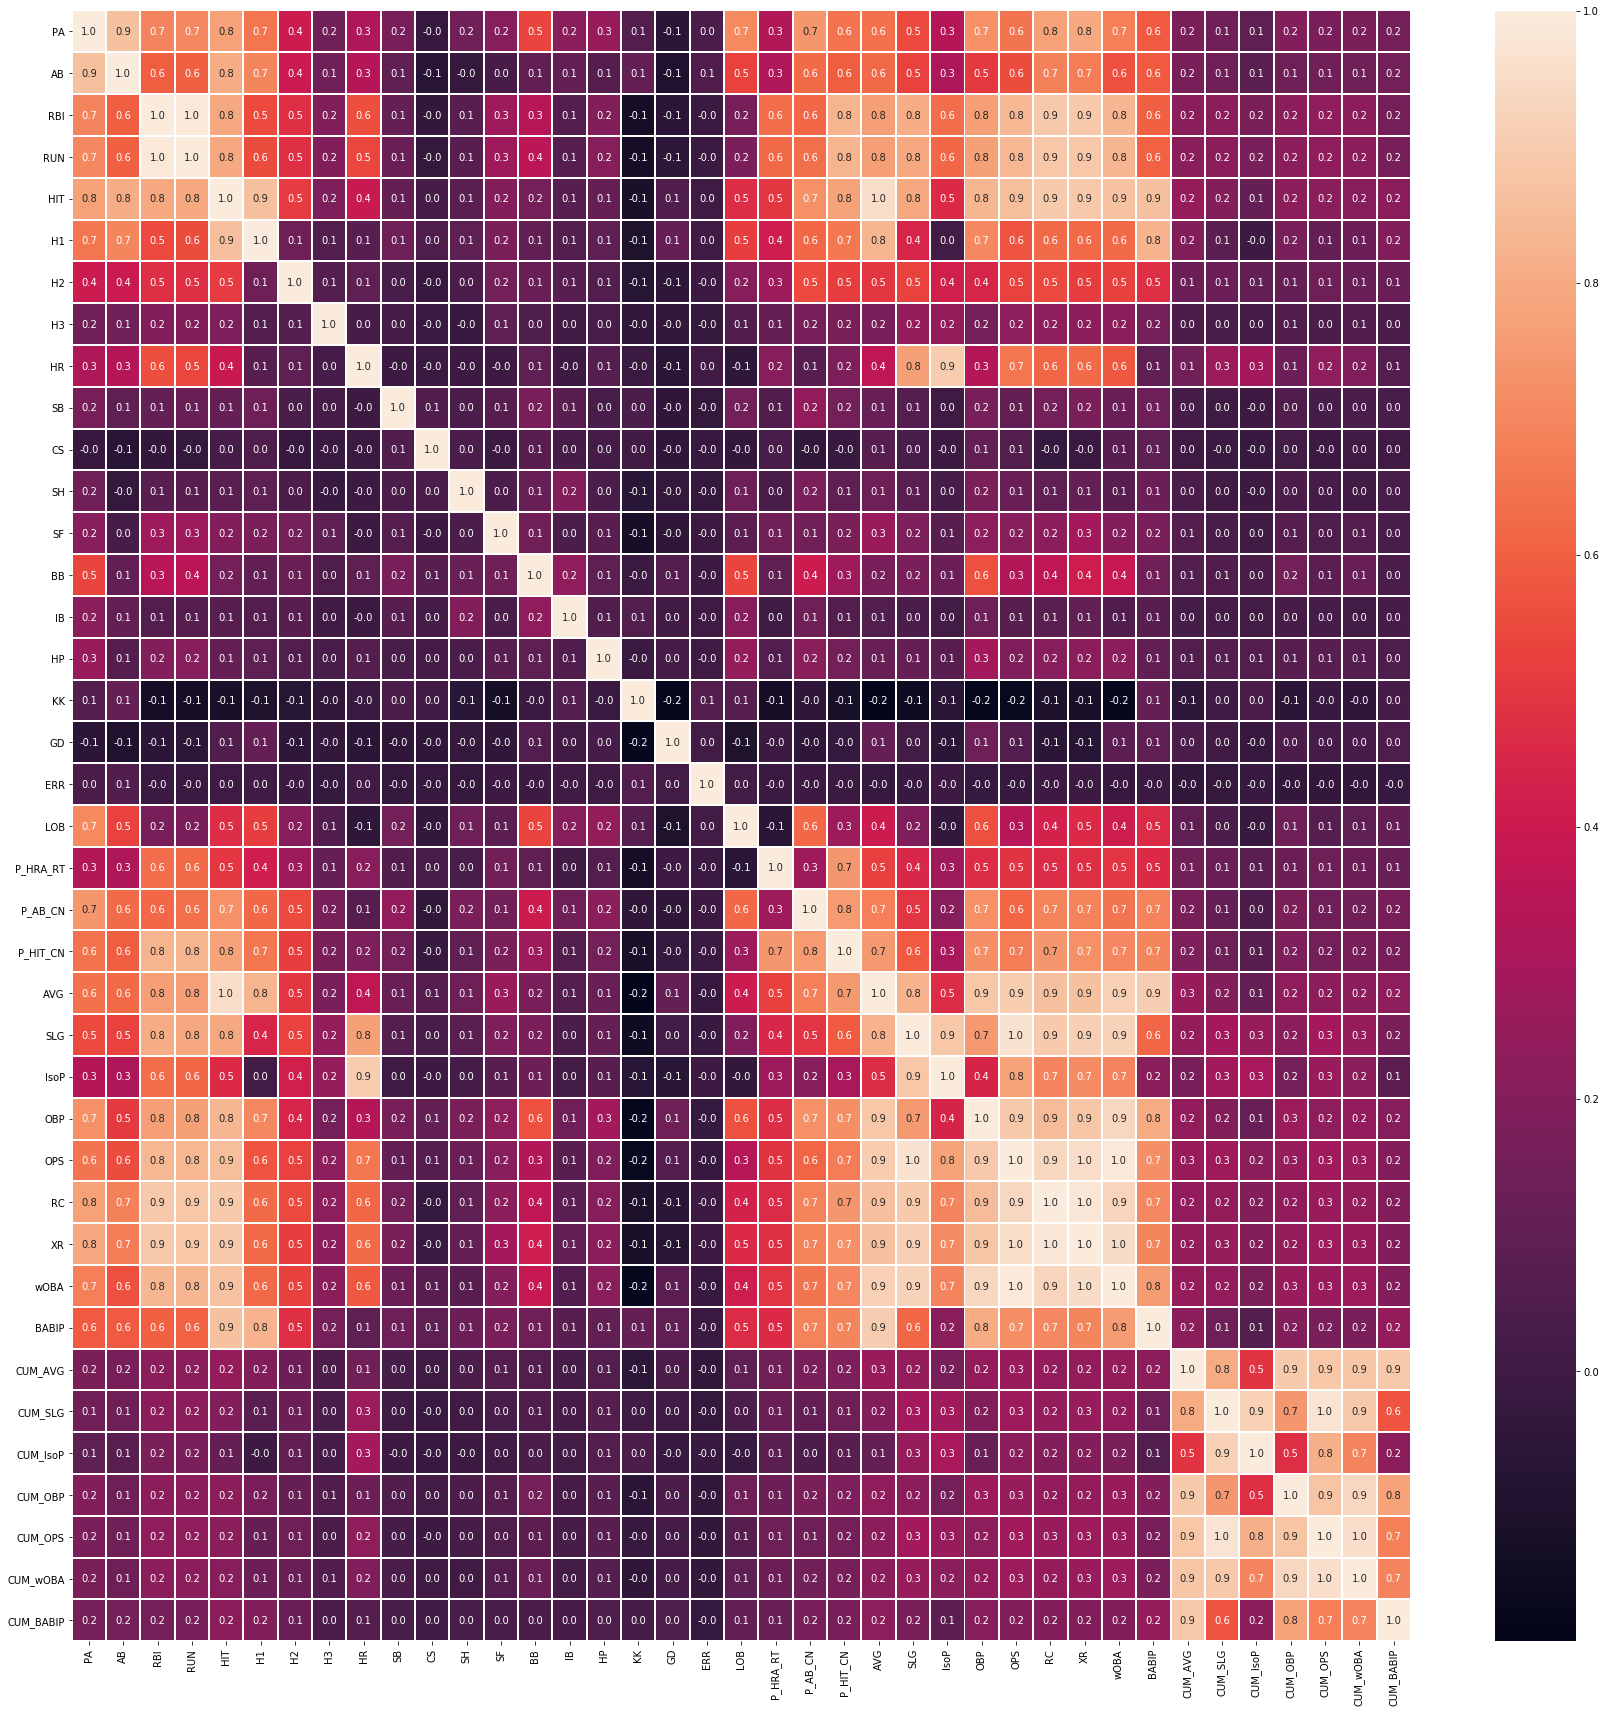

In [12]:
cor(data)

### 상관관계를 보면 RUN(득점)과의 상관관계가 높게 나오는 경우
* 팀별 누적으로 구한 파생변수보다 경기별로 구한 파생변수 간의 상관관계가 더 높게 나옴
* 따라서 누적으로 만든 파생변수를 제외하고 다시 바라보겠음

In [13]:
data = data.iloc[:,:-7]

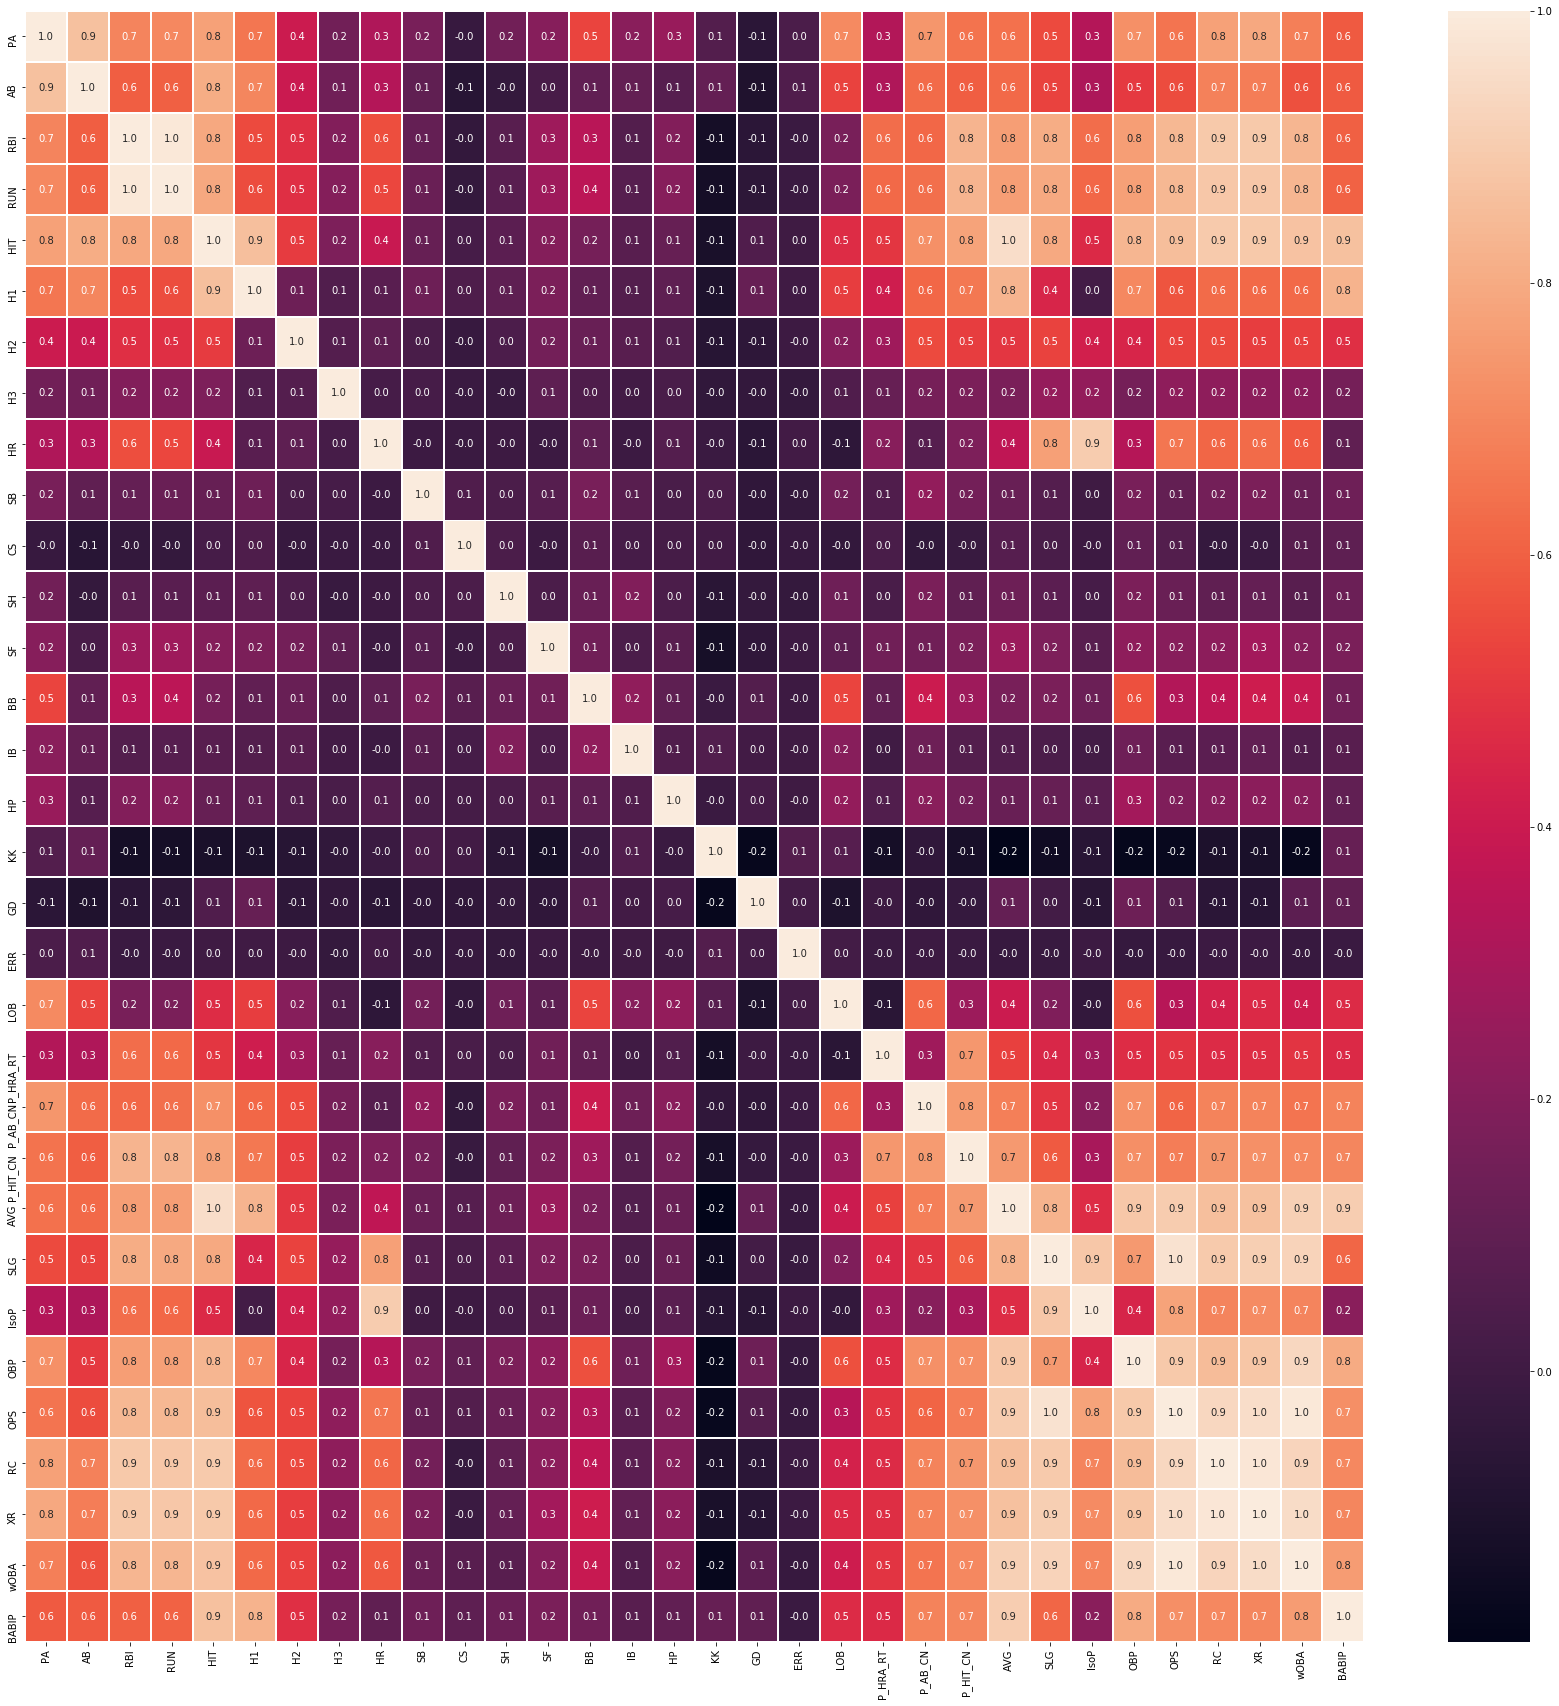

In [14]:
cor(data)

### 만든 파생변수들 간의 상관관계가 높은경우
* XR, OPS, IsoP, BABIP만 선택
* XR과 OPS 사이의 상관관계가 높은점 고려해야함!!
* XR이 추정득점인데 예상되는 득점으로 실제 득점을 예측한다??

In [15]:
data = data.drop(['AVG','SLG','OBP','RC','wOBA'],axis=1)

## Scaling
* 타석에 포함되는 것은 타석으로 나누어 경기별 scaling
* 타석, XR, 병살타, 실책 -> MinMax 사용

In [16]:
# 타석으로 나누는 작업
col = ['AB','HIT','H1','H2','H3','HR','SH','SF','BB','HP','KK']
for i in range(len(col)):
    data.loc[:,col[i]] = data.loc[:,col[i]]/data.loc[:,'PA']

In [17]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['PA','XR','GD','ERR']])
data.loc[:,['PA','XR','GD','ERR']] = scaler.transform(data[['PA','XR','GD','ERR']])

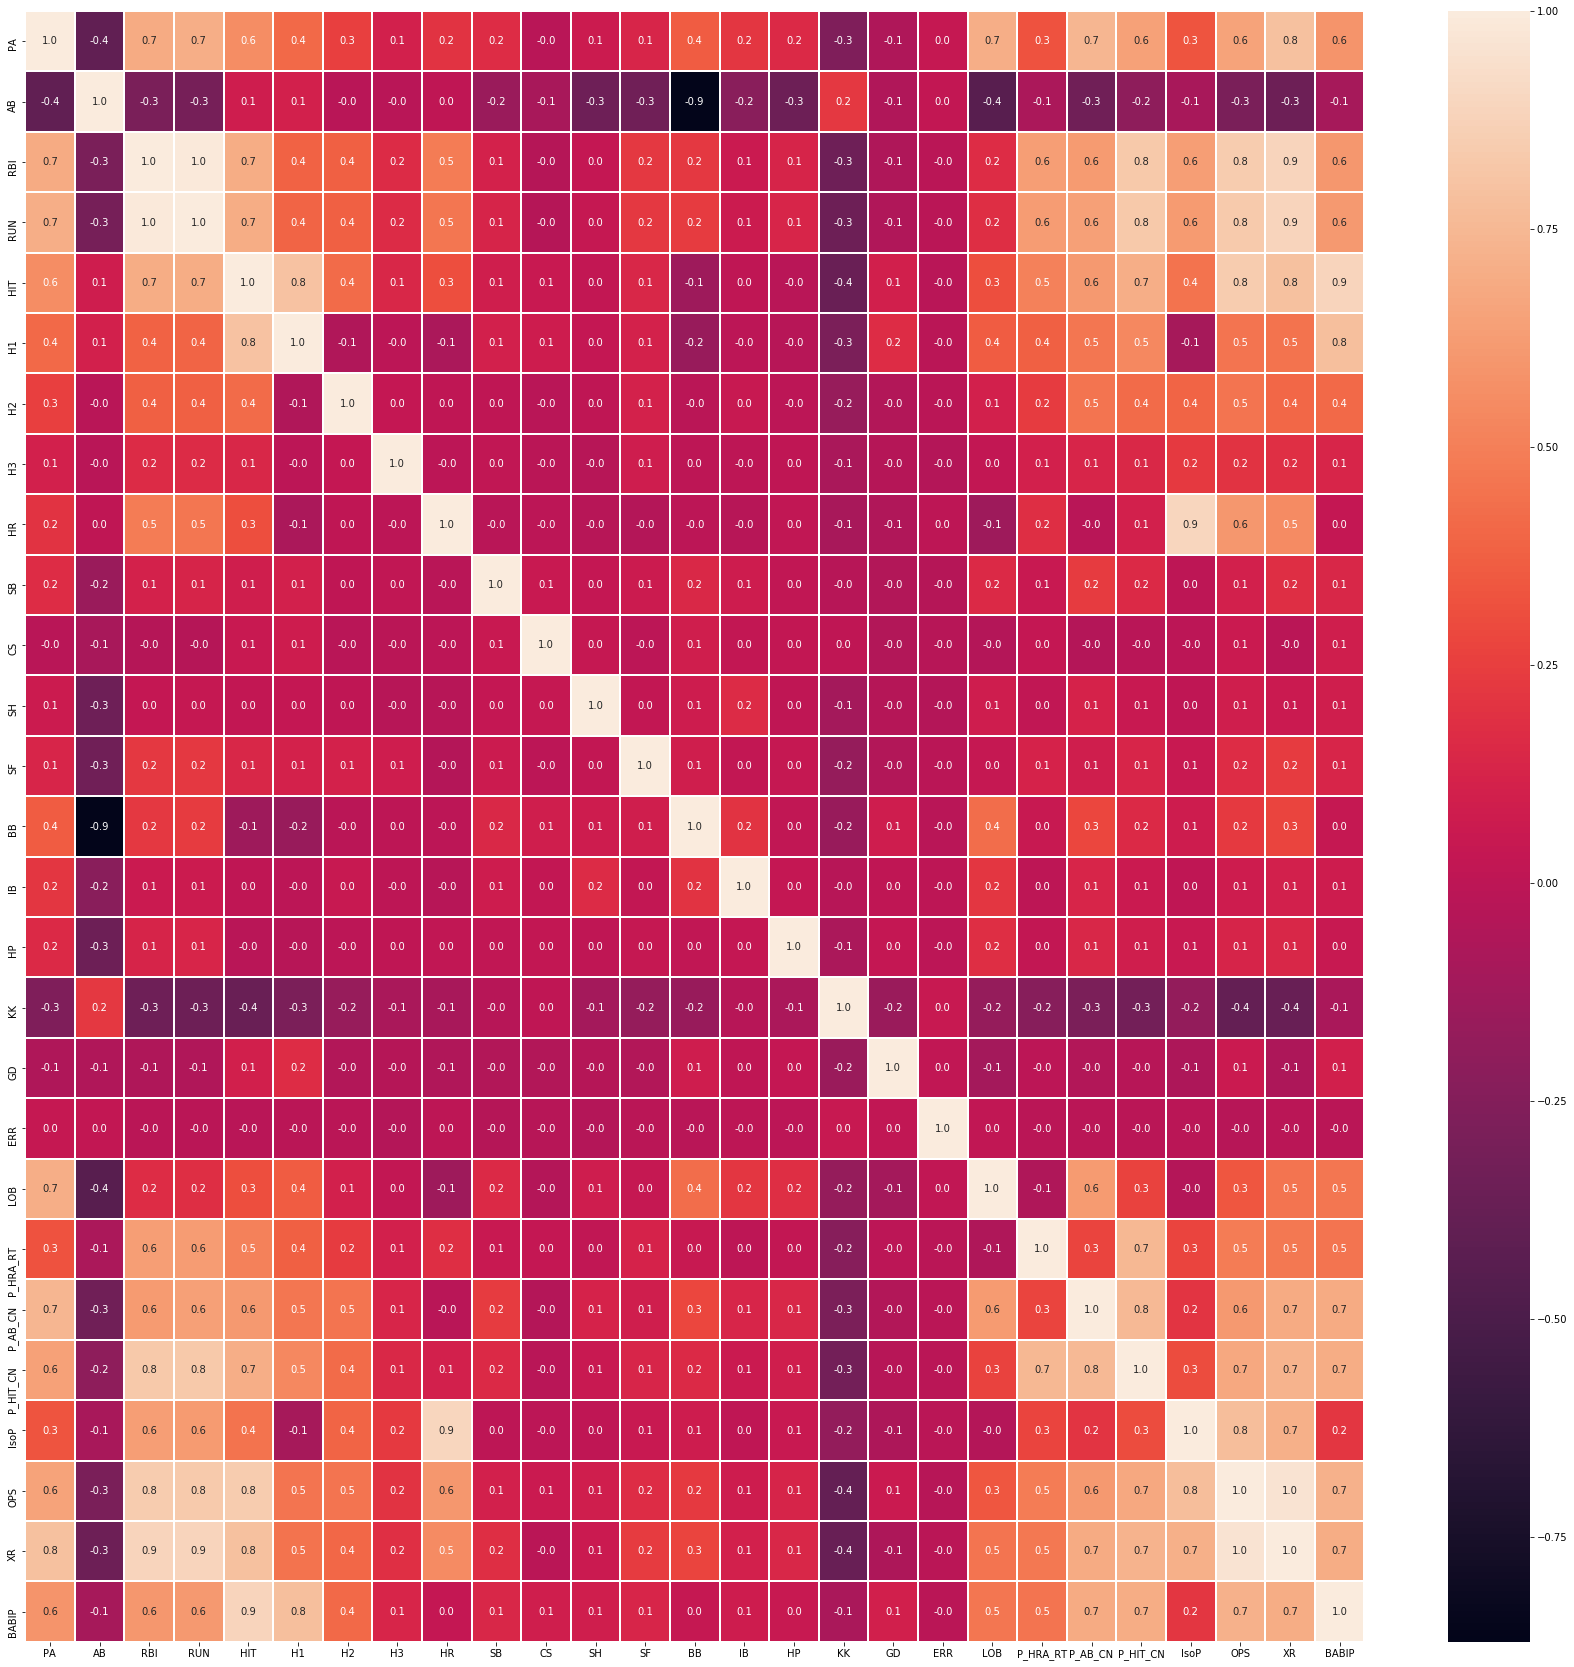

In [18]:
cor(data)

In [19]:
# HEADER_NO, TB_SC dummy화
data = pd.concat([data, pd.get_dummies(data['HEADER_NO'], prefix='HEADER_NO', drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['TB_SC'], prefix='TB_SC', drop_first=True)], axis=1)
data = data.drop(['HEADER_NO', 'TB_SC'], axis=1)

## 변수 중요도 확인

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
data.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'PA', 'AB', 'RBI', 'RUN', 'HIT',
       'H1', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK',
       'GD', 'ERR', 'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN', 'IsoP', 'OPS',
       'XR', 'BABIP', 'HEADER_NO_1', 'HEADER_NO_2', 'TB_SC_T'],
      dtype='object')

In [22]:
X = data.drop(['G_ID','GDAY_DS','T_ID','VS_T_ID','RBI','RUN','SB','CS','IB','LOB'],axis=1)
y = data.RUN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestRegressor

0.9829434978685921
0.8784513479497686


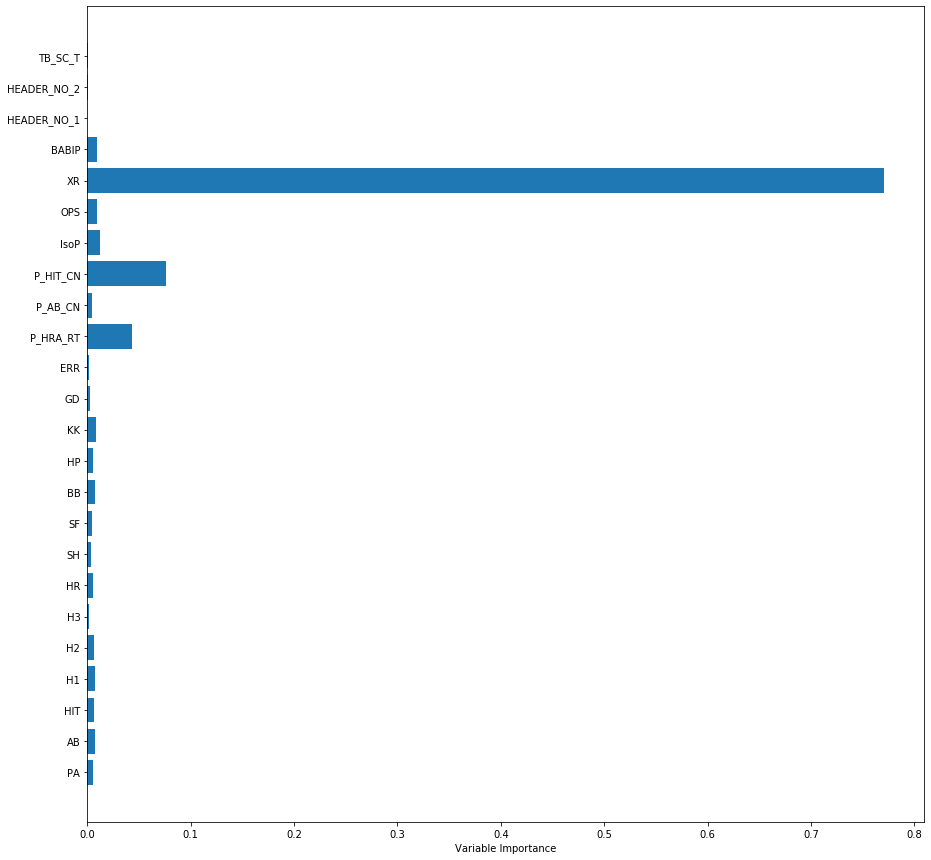

In [24]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(X_test.columns, rf.feature_importances_)
ax.set_xlabel('Variable Importance')
plt.show()

In [25]:
data.to_csv('./data/hitter_scaled.csv')

## 중요 고려사항!!
* XR이 득점과의 상관관계도 높고, 변수 중요도 역시 높은데 해석을 하면 추정득점(XR)으로 득점(R)을 예측한다??
* 마찬가지로 도루성공, 도루실패, 잔루를 어떻게 사용할 것인지가 의문 -> 현재는 X에서 제외한다고 생각
* 고의사구(IB)는 볼넷(BB)에 포함되기에 X에서 제거함
* 투수에서는 실책을 dummy화 시켰는데, 타자에서는 MinMaxScaler 사용함 -> 통일 필요 어떤 것이 더 나을지?